# Lecture 10 - Motor Control-USING Darryl G. Thelen MODEL


In [1]:
import numpy as np # Import numpy library
import matplotlib.pyplot as plt  # Import matplotlib.pyplot libary for graphics
import math # Import math library for some specific math functions

%matplotlib inline

### Muscle properties

In [2]:
Lslack = .223 # No force is generated below this force

Lce_o = .093 #optmal length

Fmax = 3000 #maximal Force generate by the muscle


### Initial conditions

In [3]:
LceNorm = .087/Lce_o #normalized initial size of the muscle
t0 = 0 #initial time of the simulation
tf = 2.99 #end time of the simulation
h = 1e-3 #Range of time

In [4]:
t = np.arange(t0,tf,h) #create time vector
F = np.empty(t.shape) #create muscle Force Vector
Fkpe = np.empty(t.shape) #create parallel Force Vector
fiberLength = np.empty(t.shape) #create fiber Lenght Vector
fiberLength = np.empty_like(t) #Other way to create fiber Lenght Vector
tendonLength = np.empty(t.shape)#create tendon Lenght Vector

In [5]:
def computeTendonForce(LseeNorm, Lslack, Lce_o):
    '''
    Compute Tendon Force
    
    Inputs:
    
    LseeNorm - Normalized Tendon  length
    
    Lslack - slack length of the tendon (non-normalized)
    
    Lce_o - Optimal length of the fiber
    
    Output:
    
    FtendonNorm - Normalized tendon force
    '''
    
    Umax = .04
    if LseeNorm<Lslack/Lce_o: 
        FTendonNorm = 0
    else: 
        FTendonNorm = ((LseeNorm-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
        
    return FTendonNorm

In [6]:
def computeParallelElementForce(LceNorm):
    
    '''
    computeParallelElementForce(FKpe)
    
    Inputs:
    
    LCeNorm - Normalized fiber length
    
    Outputs:
    
    FkpeNorm - Parallel element force
    
    '''
    Umax = 1
    if LceNorm < 1: 
        FkpeNorm = 0
    else: 
        FkpeNorm = ((LceNorm-1)/(Umax))**2 
        
    return FkpeNorm

In [7]:
def computeForceLengthCurve(LceNorm):
    '''
    Inputs:
    
    LceNorm - Normalized fiber length
    
    Output:
    
    FLNorm- Normalized muscle Force
    
    '''
    width = .63 
    FLNorm = max([0, (1-((LceNorm-1)/width)**2)])
    return FLNorm

In [8]:
def computeContractileElementDerivative(FLNorm, FCENorm):
    '''
    Inputs:
        
    FLNorm- Normalized muscle Force
    FCENorm- Normalized contractille element Force
        
    Outputs:
        
    LceNormdot - Velocity of the contraction of the fiber
        
    '''
    Lce_o = .093
    a=1
    af=0.25
    Vmax=10/Lce_o 
    Flen=1.4/Lce_o  
    
    if FCENorm > a*FLNorm:
        b=((2+(2/af))*((a*FLNorm*Flen)-FCENorm))/(Flen-1)
        
    if FCENorm <= a*FLNorm:
        b= (a*FLNorm)+(FCENorm/af)
        
    LceNormdot = (0.25+0.75*a)*Vmax*(FCENorm*FLNorm/b)
    
    return LceNormdot

In [9]:
def computeContractileElementForce(FtendonNorm, FkpeNorm):
    '''
    Inputs:
        
    FtendonNorm- Normalized tendon Force
    FkpeNorm- Normalized Parallel element Force
        
    Outputs:
        
    FCENorm - Normalized contractille element Force
        
    '''
    FCENorm = FtendonNorm - FkpeNorm
    return FCENorm

In [10]:
def computeTendonLength(Lm, Lce_o, LceNorm):
    '''
        Inputs:
        
        Lm - Lenght of the fiber
        Lce_o= optmal lenght of the fiber
        Lce_o= Normalized lenght of the fiber
        
         Outputs:
        
        LseeNorm - Normalized series element lenght
        
        '''
    LseeNorm = Lm/Lce_o - LceNorm
    return LseeNorm

## Simulation - Parallel

In [11]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.35
    elif t[i]>1 and t[i]<2:
        Lm = 0.35 - 0.04*(t[i]-1)
        #print(Lm)
    ########################################################
    LseeNorm = computeTendonLength(Lm, Lce_o, LceNorm) #compute Normalized series element lenght
    
    FTendonNorm = computeTendonForce(LseeNorm, Lslack, Lce_o) #compute Normalized Tendon Force
        
    FkpeNorm = computeParallelElementForce(LceNorm) #compute Normalized Parallel element Force
      
    FLNorm = computeForceLengthCurve(LceNorm)  #compute Normalized Series element Force 
    
    FCENorm = computeContractileElementForce(FTendonNorm, FkpeNorm) #compute contractile element Force 
    
    LceNormdot = computeContractileElementDerivative(FLNorm, FCENorm) # compute velocity of the contraction of the fiber
    
    LceNorm = LceNorm + h*LceNormdot # compute lenght of the contractile element of the fiber
    #########################################################################
    F[i] = FTendonNorm * Fmax #Calculate the force of the fiber 
    fiberLength[i] = LceNorm * Lce_o # Calculate the lenght of the fiber
    tendonLength[i] = LseeNorm * Lce_o # Calculate the lenght of the Tendon
    

## Plot  Force

Text(0,0.5,'Force [N]')

<Figure size 432x288 with 0 Axes>

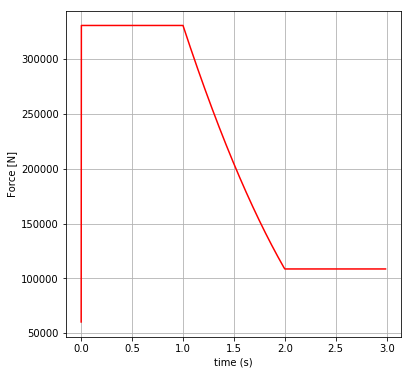

In [12]:
plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)


ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')


#ax.legend()

In [13]:
## Plot  Lenght

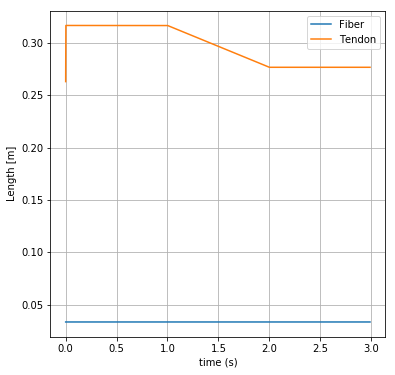

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,fiberLength, label = 'Fiber')
ax.plot(t, tendonLength, label = 'Tendon')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time (s)')
plt.ylabel('Length [m]');

In [15]:
## Plot Spared Fiber and Tendon

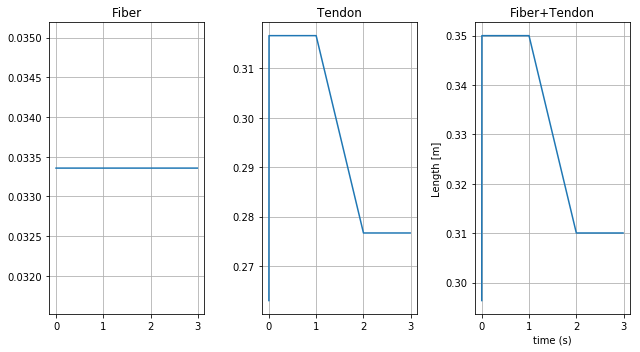

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(9, 5), sharex=True)

ax[0].plot(t, fiberLength, label = 'Fiber')
ax[0].set_title('Fiber')
ax[0].grid()
ax[1].plot(t, tendonLength, label = 'Tendon')
ax[1].set_title('Tendon')
ax[1].grid()
ax[2].plot(t, fiberLength+tendonLength, label = 'Fiber+Tendon')
ax[2].set_title('Fiber+Tendon')
ax[2].grid()
plt.xlabel('time (s)')
plt.ylabel('Length [m]')
plt.tight_layout()